# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0, low_memory=False) #pulls in the data csv from the save folder as this notebook 
#pd.set_option('display.max_columns', 360) #expands the max number of viewable row

In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape #shows the shape of our data set

(34545, 358)

In [5]:
df.rename (columns={'_STATE':'state', 'PHYSHLTH': 'physical_health', 'SMOKDAY2': 'smoking'}, inplace = True) # renames 3 of our columns in our data frame

In [6]:
conditions = [df['state'] == 9., df['state'] == 34., df['state'] == 36.] #connects the state to these values 
choices = ['Connecticut', 'New Jersey', 'New York'] #sets the state name options 
df['state'] = np.select(conditions, choices, default = 'NA') #links these state names to the associatd number

In [7]:
df['physical_health'].value_counts() #counts the number of instances of each number in our dataset in the physical health column

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: physical_health, dtype: int64

In [8]:
df.head() #calls first 5 rows of our dataset

,state,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,Connecticut,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,Connecticut,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,Connecticut,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [9]:
df[df['state'].isin([9,34,36])] #subsets data to only include the states wanted

,state,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3


In [10]:
df['physical_health'].describe() # shows info about our data now

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: physical_health, dtype: float64

Now check to see how large our subset df.

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
#df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 88.0, 0, df['PHYSHLTH']) 


In [12]:
df.drop(df.loc[df['physical_health'] == 99.0 ].index, inplace=True)   # Delete values where patient - 'Refused'
df.drop(df.loc[df['physical_health'] == 77.0 ].index, inplace=True)   # Delete values where patient - 'Don't know/Not Sure
df.physical_health = np.where(df.physical_health == 88.0, 0, df.physical_health) # Transforms 88. into 0
df.physical_health.shape #calls the shape of our data

(33747,)

In [13]:
#df[df['PHYSHLTH'] <= 30]['PHYSHLTH'].mean() 

In [14]:
df.physical_health.describe() #displays info about dataframe to check

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: physical_health, dtype: float64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [15]:
# descriptive statistics
len(df.physical_health.unique()) #tells us the length of our unique values in physical health

31

In [16]:
df.physical_health.describe() #displays info about dataframe to check


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: physical_health, dtype: float64

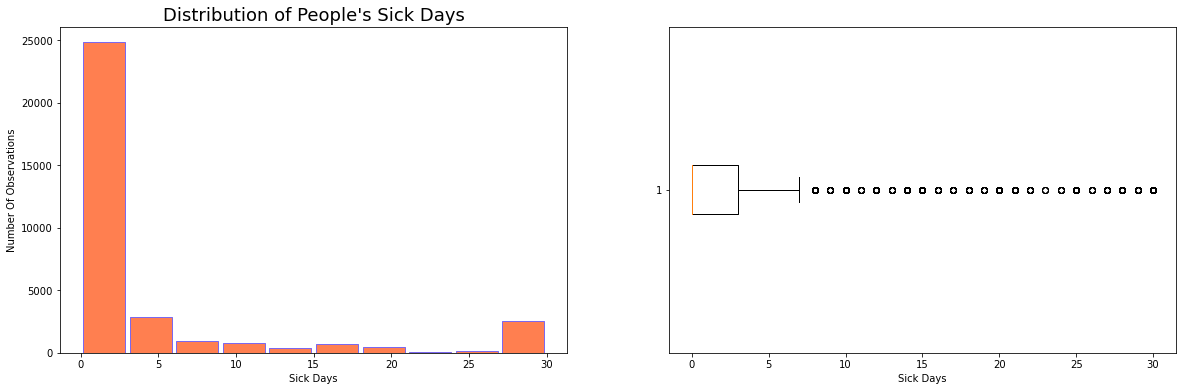

In [17]:
fig = plt.figure(figsize=(20,6)) #denotes a figue

ax1 = fig.add_subplot(1,2,1)  #gives specss for our first chart
ax2 = fig.add_subplot(1,2,2) #gives the specs for the second chart

ax1.hist(df.physical_health, color='coral', rwidth = 0.9, edgecolor= 'mediumslateblue') #sets our first figure as a hist with a color and edge color
ax1.set_title("Distribution of People's Sick Days", size= 18) #sets the title for the hist
ax1.set_xlabel('Sick Days', size=10) #labels or x axis
ax1.set_ylabel('Number Of Observations', size=10) #labels our y axis 

ax2.boxplot(df.physical_health, vert = False) #denots our second graph as a boxplot
ax2.set_xlabel('Sick Days', size=10) #labels our x axis 
plt.show() #displays our graph without the array at the top 

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [18]:
# code to calculate the average number of sick days by state
state_grouped = df.groupby('state')['physical_health'].mean() #displays the mean of each state 
state_grouped

state
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: physical_health, dtype: float64

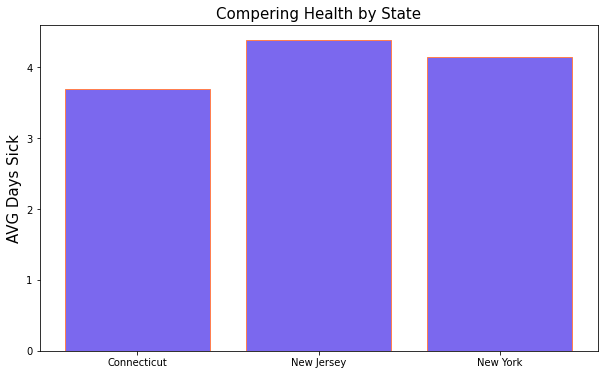

In [19]:
fig, ax = plt.subplots(figsize=(10,6))   #sets up a figure
ax.bar(state_grouped.index ,state_grouped.values, color='mediumslateblue', edgecolor= 'coral', align='center') #denotes our chart as bar chart 
ax.set_title('Compering Health by State', size=15) #sets the title
ax.set_ylabel('AVG Days Sick', size=15) #sets the title of y axis
plt.show() #shows the chart 

In [20]:
ct = df.loc[ df['state'] == 'Connecticut' , ['physical_health']] #maps the state to the physical health
nj = df.loc[ df['state'] == 'New Jersey' , ['physical_health']] #same
ny = df.loc[ df['state'] == 'New York' , ['physical_health']] #same

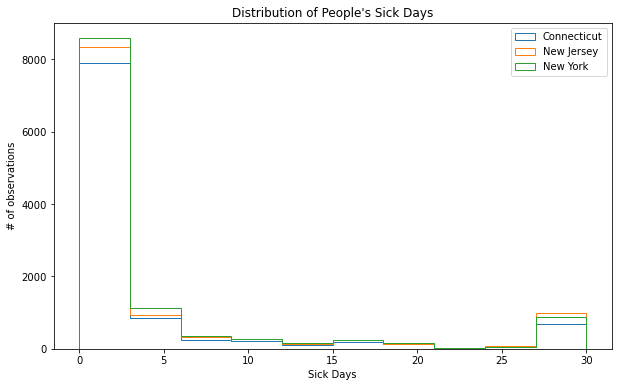

In [21]:
#graphic showing the histogram of data
fig, ax = plt.subplots(figsize=(10,6)) #sets the figure

ax.hist(ct.values , label="Connecticut", histtype='step')  #plots the ct info on a hist
ax.hist(nj.values, label="New Jersey", histtype='step') #plots the cj info on a hist
ax.hist(ny.values, label="New York", histtype='step') #plots the ny

ax.set_xlabel('Sick Days') #sets the name of the x label
ax.set_ylabel('# of observations') #sets the name of the y label
ax.set_title("Distribution of People's Sick Days") #sets the title of the chart 
ax.legend() #displays a legens for our chart
plt.show() #displays our chart 

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [22]:

# code to create new colum for chronically sick
df['chron'] = np.where(df['physical_health']>20, 1, 0) #uses where function to say if someones physical health is sick for more than 20 days then it is TRUE that they are chron sick and otherwise they are health FALSE

In [23]:
df['chron']

49938     0
49939     0
49940     0
49941     0
49942     0
         ..
303774    0
303775    0
303776    0
303777    0
303778    0
Name: chron, Length: 33747, dtype: int64

In [24]:
df.chron.value_counts() #displays our counts for the above info where 0 false or healthy and 1 is True or chronically sick

0    30936
1     2811
Name: chron, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [25]:
# code to calculate averages per state
#x=df.groupby(['_STATE','chron'])['chron'].count() 
#y=df.groupby(['_STATE'])['chron'].count()
#r=((x/y)*100).round(2) 
#print(r)

In [26]:
# code to calculate averages per state
chron_sick=df.groupby('state')['chron'].value_counts(normalize=True).loc[:,1]*100 #groups our chronically sick values by state and turns them into a percentage 
chron_sick  #calls the above function

state
Connecticut    7.346586
New Jersey     9.451911
New York       8.108791
Name: chron, dtype: float64

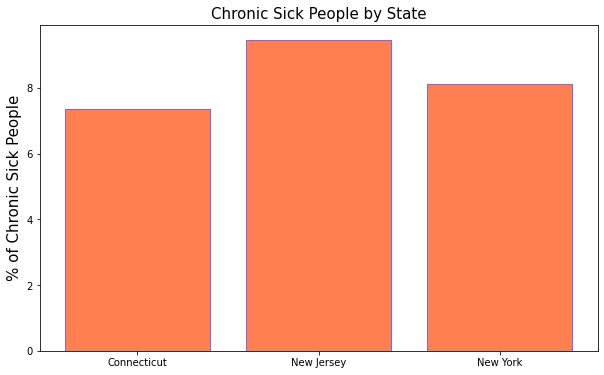

In [27]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots(figsize=(10,6))  #calls a figure 
ax.bar(chron_sick.index ,chron_sick.values, color='coral', edgecolor= 'mediumslateblue', align='center') #calls our figure as a barchart sets a color an aligns it
ax.set_title('Chronic Sick People by State', size=15) #sets the title
ax.set_ylabel('% of Chronic Sick People', size=15) #labels our y axis
plt.show() #shows our chart

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [28]:
df = df[~df.smoking.isna()]  # droping NaN from smoking
conditions = [ df['smoking'] == 1.0 ,df['smoking'] == 2.0 ,df['smoking'] == 3.0, df['smoking'] == 7.0, df['smoking'] == 9.0] #assigns labels to the number values
choices = ['Everyday', 'Some Days', 'Non-Smoker', "Dont'know", 'Refused'] # sets this as our choices variable of labels 
df['smoking'] = np.select(conditions, choices) #connects our values to our chosen labels

In [29]:
pct_smoking = df['smoking'].value_counts(normalize=True)*100 #turns altered data into a percent 
pct_smoking #calls this function 


Non-Smoker    70.493020
Everyday      19.386694
Some Days      9.919810
Refused        0.155925
Dont'know      0.044550
Name: smoking, dtype: float64

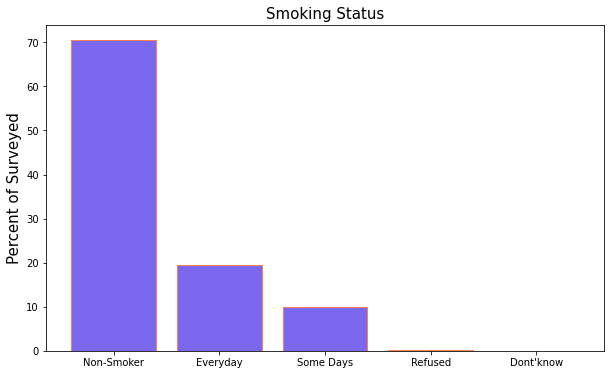

In [30]:
fig, ax = plt.subplots(figsize=(10,6)) #creates a figure 
ax.bar(pct_smoking.index ,pct_smoking.values, color='mediumslateblue', edgecolor= 'coral', align='center') #plots our above data as a bar chart
ax.set_title('Smoking Status', size=15) #sets the chart title
ax.set_ylabel('Percent of Surveyed', size=15) #sets the y label
plt.show() #shows out chart

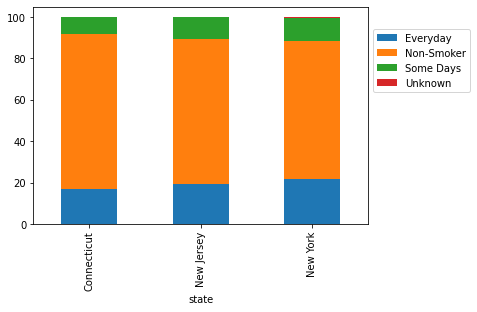

In [31]:
# code to graph these averages sick days for each category of smoking status 
smk_groupped = df.groupby(['state'])['smoking'].value_counts(normalize=True)*100 #sets our data to a variable

unst = smk_groupped.unstack() #creates a stack
unst['Unknown'] = unst['Refused']+ unst["Dont'know"] #combines refused and dont know as unknown
unst.drop(columns=["Dont'know",'Refused'],inplace=True) #drops don't know and refused from our graph
unst.plot(kind = 'bar', stacked = True , legend = '1') #plots the data on a bar graph 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75)) #creates a legend and moves it to the side 
plt.show() #displays our chart 

In [32]:
unst = smk_groupped.unstack()  #pivots the index label

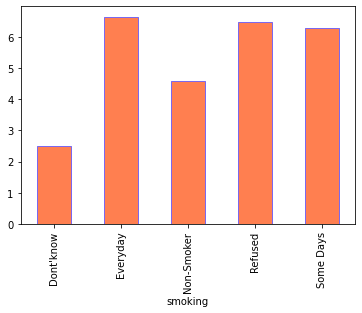

In [33]:
df1 = df.groupby('smoking')['physical_health'].mean() #groups our data by mean
df1.plot(kind = 'bar', color = 'coral', edgecolor='mediumslateblue') #plots the info on a bar
plt.show() #shows our chart

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [34]:
# 1. code here to clean up the ALCDAY5 responses
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            } #replace these values in a dictionary as stated

df['alcohol'] = df['ALCDAY5'].replace(alc_dict) #calls the above action on a specific dataframe

In [35]:
# 2 . descriptive statistics of cleaned data 
df['alcohol'].describe()

count    13127.000000
mean       112.285747
std         94.710199
min          0.000000
25%          0.000000
50%        104.000000
75%        204.000000
max        230.000000
Name: alcohol, dtype: float64

In [36]:
#function transforms the data to be on the same monthly scale. 
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min(int((x-100)*4.34524), 30)
    else:
        return x

In [37]:
df['alcohol']= df['alcohol'].apply(calc_monthly) #applies function the data frame 

In [38]:
df['alcohol'].describe() #checks data for trandformation 

count    13127.000000
mean         6.580712
std          9.454206
min          0.000000
25%          0.000000
50%          2.000000
75%          8.000000
max         30.000000
Name: alcohol, dtype: float64

/Users/ji/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/ji/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Users/ji/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ji/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


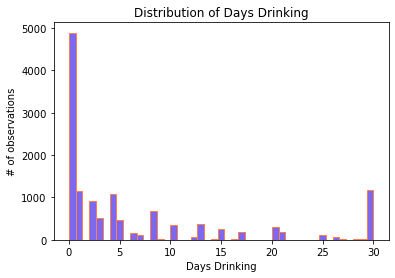

In [39]:
# 3.  graphic showing the histogram of data

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins='auto', color='mediumslateblue', edgecolor='coral')

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [40]:
# 4. code to calculate averages per state
drink_days=df.groupby('state')['alcohol'].mean() #groups our number of drinking days values by state and turns them into a percentage 
drink_days  #calls the above function

state
Connecticut    7.195330
New Jersey     6.137787
New York       6.465179
Name: alcohol, dtype: float64

In [41]:
# 5. Code to calculate correlation of between number of dirnks of number of days physically ill 
df[['physical_health', 'alcohol']].corr()['physical_health']


physical_health    1.00000
alcohol           -0.11781
Name: physical_health, dtype: float64

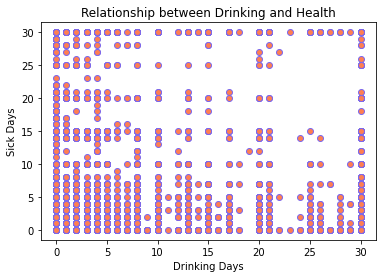

In [42]:
# 6. 
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["physical_health"], color = 'coral', edgecolor = 'mediumslateblue')

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

## 8. Statistical Inference


Create a 95% confidence interval for the population mean of physically ill days.

Create a 95% confidence interval for the true proportion of chronically sick people.

Mean =

Standard Deviation = 

Confidence Factor = 

In [43]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import scipy.stats as stats 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

In [44]:
def conf_interval(sample, q):
    
    sample_size = len(sample) #Takes the number of observations in our sample aka n value
    x_hat = sample.mean() #Sums the the number of observations and divides by the numbers to get your mean aka x-hat
    
    z = stats.norm.ppf(q) #Takes in your confidence value,  associated with 95% but only for one side so at 95% + plus the one tail to get 97.5
    stdev = sample.std()  #Standard deviation of the sample 
    
    moe = z * (stdev/math.sqrt(sample_size)) #Calculates your margin or error which std devided by the square root of your sample size 
    
    conf = (x_hat - moe, x_hat + moe) #Returns confidence inteval which your average + or minus (in this case returning both) your moe 
    return z, moe, conf  

- Create a 95% confidence interval for the population mean of physically ill days.

In [45]:
q = .975
z_critical, margin_of_error, confidence_interval = conf_interval(df['physical_health'], q) #maps the items returned from fucntion in the same order 
print("Z-critical value:")              
print(z_critical)         
print ('\nMargin of Error')
print(margin_of_error)
print("\nConfidence Interval:")
print(confidence_interval)

Z-critical value:
1.959963984540054

Margin of Error
0.16098210431842422

Confidence Interval:
(4.994423301086981, 5.316387509723829)


-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [46]:
z_critical, margin_of_error, confidence_interval = conf_interval(df['chron'], q) #maps the items returned from fucntion in the same order 
print("Z-critical Value:")              
print(z_critical)         
print ('\nMargin of Error')
print(margin_of_error)
print("\nConfidence Interval:")
print(confidence_interval) 

Z-critical Value:
1.959963984540054

Margin of Error
0.005308669259863168

Confidence Interval:
(0.10584369189249798, 0.11646103041222433)


## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### 9A - 1: 
>1. Write down the null and alternative hypothesis you are testing.
<br>$ H_0 $: mu = 4       $ H_1 $: mu != 4

>2. Select the appropriate test and calculate the test statistic and P-values.
<br>-We will use a t-test for a mean because we only have the sample standard deviation. 

>3. Determine the critical value for the 95% confidence interval. 
<br>t-crit 1.96

>4. Evaluate the test statistic agains the critical value.
<br>t-test = 14.06711007863357, p-value = 1.2516778487079456e-44

>5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.  
<br>We will reject our null hypothesis because our test statistic is significantly higher than our critical value (1.96) with 95% confidence.
    
   - The probability of getting this sample mean for days physically ill, if the population mean is 4 is 1.2516778487079456e-44. 


In [47]:
#Code for #1 

phy_hlth = df['physical_health']
mu = 4 # aka population mean
alpha = .05 #assumed alpha
phy_hlth_mean = phy_hlth.mean()

def one_sample_t_test(sample, population_mean, alpha):   
    mu = population_mean #population mean
    x_bar= sample.mean() # Sample mean 
    sample_std = np.std(sample) # Sample standard deviation
    df = len(sample) - 1 # Degrees of freedom

    t_crit = stats.t.ppf(1 - alpha, df)     #Calculate the t-value
    results = stats.ttest_1samp(a = sample, popmean = mu) 
    return results
        
one_sample_t_test(phy_hlth, mu, alpha)

Ttest_1sampResult(statistic=14.06711007863357, pvalue=1.2516778487079456e-44)

In [48]:
# def one_sample_ttest(sample, popmean, alpha):
#    # Population mean 
#    mu = popmean
#    # Sample mean (x̄) using NumPy mean()
#    x_bar= sample.mean()
#    # Sample Standard Deviation (sigma) using Numpy
#    sigma = np.std(sample)
#    # Degrees of freedom
#     df = len(sample) - 1  
#     #Calculate the critical t-value
#     t_crit = stats.t.ppf(1 - alpha, df=df)
#     #Calculate the t-value and p-value
#     results = stats.ttest_1samp(a= sample, popmean= mu)         
#     if (results[0]>t_crit) or (results[0]<(-t_crit)) or (results[1]<alpha):
#         print ("We reject null hypothesis. Results are statistically significant with t-value =", 
#                 round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
#     else:
#         print ("We fail to reject the null hypothesis. Results are statistically insignifcant with t-value ==", 
#                 round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10)) 
# one_sample_ttest(phy_hlth, mu, alpha)

### 9A - 2: 
>1. Write down the null and alternative hypothesis you are testing.
<br>$ H_0 $: mu1 = mu2       $ H_1 $: mu1 != mu2

>2. Select the appropriate test and calculate the test statistic and P-values.
<br>-We will use a two sample t-test because we want to compare two means and the population stds are unknown.  

>3. Determine the critical value for the 95% confidence interval. 
<br>t-critical +/- 1.645

>4. Evaluate the test statistic agains the critical value.
<br>t-test = 4.310377925611631, p-value = 1.654129247374847e-05

>5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.  
<br>We will reject the null hypothesis because my test statistic is greater than 1.645 and my p-value is below alpha.
    
   - Yes, there is sufficient evidence to state that there is a statistically significant difference between men and women in the number of days a person feels physically ill.

In [49]:
#2 Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?

#Create variables
map_sex = {1:'Male',  2: 'Female', 9: np.nan}
df['SEX'] = df['SEX'].replace(map_sex)
fem = df.groupby('SEX')['physical_health'].get_group('Female')
mal = df.groupby('SEX')['physical_health'].get_group('Male') 

#import needed packages
from scipy.stats import t as st

#define function for two sample t-test (two tailed)
def independent_ttest(data1, data2, alpha):

# calculate needed numbers for samples
    mean1, mean2 = np.mean(data1), np.mean(data2)
    std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/math.sqrt(n1), std2/math.sqrt(n2)

# calculate standard error, test stat, and degrees of freedom
    sed = math.sqrt(se1**2.0 + se2**2.0)
    t_stat = (mean1 - mean2) / sed
    df = min(len(data1), len(data2)) - 1

# calculate the critical value and p-value
    alpha = 0.05
    cv = st.ppf(1.0 - alpha, df)
    p = (1.0 - st.cdf(abs(t_stat), df)) 

# return everything
    return t_stat, cv, p

independent_ttest(fem,mal,0.05) 

(4.310377925611631, 1.6450911566467321, 8.270646236874235e-06)

### 9A - 3: 
>1. Write down the null and alternative hypothesis you are testing.
<br>$ H_0 $: mu1 = mu2 = mu3       $ H_1 $: At least one mean is different.

>2. Select the appropriate test and calculate the test statistic and P-values.
<br>-We will use a one way ANOVA because we are comparing the means of three different samples with one independent variables.   

>3. Determine the critical value for the 95% confidence interval. 
<br>F-test stat: 8.43346376043238             p-value: 0.00021861768601751048

>4. Evaluate the test statistic agains the critical value.
<br>We will reject the null hypothesis because our p-value is less than our alpha(.05). 

>5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.  
<br>We will reject the null hypothesis because our p-value is less than our alpha(.05).
    
   - There is sufficient evidence to state that there is a statistically significant difference in physical health of people from the three states. 

In [50]:
#stats.f_oneway(df['physical_health'][df['state'] == 'Connecticut'],
#                df['physical_health'][df['state'] == 'New Jersey'], 
#                df['physical_health'][df['state'] == 'New York'])

In [51]:
#code for 9A-3
#import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Set our data variables
anova_cat_ph_by_state = ols('physical_health~state', data=df).fit()

def run_anova(sample):
    anova_table = sm.stats.anova_lm(sample, type=2)
    return anova_table 

run_anova(anova_cat_ph_by_state)

,df,sum_sq,mean_sq,F,PR(>F)
state,2.0,1.530802e+03,765.400837,8.433464,0.000219
Residual,13465.0,1.222051e+06,90.757589,NaN,NaN


### 9.B The following questions are regarding the  `CHRONIC` variable.
1. What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

### 9B - 1: 
>1. Write down the null and alternative hypothesis you are testing.
<br>$ H_0 $: p = 0.10         $ H_1 $: p != 0.10

>2. Select the appropriate test and calculate the test statistic and P-values.
<br>Z-test of proportions because we are comparing a sample proportion to a population proportion and np and n(1-p) are greater than 10.  

>3. Determine the critical value for the 95% confidence interval. 
<br>z-score +/- 1.645

>4. Evaluate the test statistic agains the critical value.
<br>z-test: 4.31416870463495  p-value: 1.6020457720866688e-05 

>5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.  
<br>We will reject our null hypothesis because our test statistic is greater than our critical value (1.645).
    
   - The probability of drawing this sample is 1.6020457720866688e-05. 

In [52]:
#Code for #1  
n = len(df['chron']) 
x = df.chron.value_counts()[1]
p_hat = x/n  
p = 0.10

z = (p_hat-p)/ math.sqrt(p*(1-p)/n) 
z 

p_value = (1 - stats.norm.cdf(z)) 
p_value, z


(1.6020457720866688e-05, 4.31416870463495)

### 9B - 2: 
>1. Write down the null and alternative hypothesis you are testing.
<br>$ H_0 $: p1 = p2         $ H_1 $: p1 != p2

>2. Select the appropriate test and calculate the test statistic and P-values.
<br>Two sample z-test because we are comparing two sample proportions to each other and np and n(1-p) are greater than 10.

>3. Determine the critical value for the 95% confidence interval. 
<br>z-score +/- 1.96

>4. Evaluate the test statistic agains the critical value.
<br>z-test: -2.3864100521943357  p-value: 0.017013768781129077

>5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.  
<br>We will reject our null hypothesis because our test statistic is less than our critical value (-1.96).
    
   - Yes, there is a statistically significant difference between men and women who are chronically sick. 

In [53]:
#Code for #2 

#Get numbers to be used in p  
fem_s = df.groupby('SEX')['chron'].value_counts()['Female'][1]
fem_h = df.groupby('SEX')['chron'].value_counts()['Female'][0] 
fem = fem_s + fem_h 
mal_s = df.groupby('SEX')['chron'].value_counts()['Male'][1]
mal_h = df.groupby('SEX')['chron'].value_counts()['Male'][0] 
mal = mal_s + mal_h
 
#Calulate p and z
p1 = mal_s/mal 
p2 = fem_s/fem   
p = (mal_s + fem_s)/(mal+fem)

z = (p1-p2)/math.sqrt(p*(1-p)*(1/mal+1/fem))
p_value = stats.norm.cdf(z)   #should this have been multiplied by two
z, p_value    

(-2.3864100521943357, 0.008506884390564538)

### 9B - 3: 
>1. Write down the null and alternative hypothesis you are testing.
<br>$ H_0 $: p1 = p2          $ H_1 $: At least one p is different

>2. Select the appropriate test and calculate the test statistic and P-values.
<br>Chi-squared because we are comparing more than three catagorical values and we're interesting in proportions.

>3. Determine the critical value for the 95% confidence interval. 
<br>critical value = 5.991

>4. Evaluate the test statistic agains the critical value.
<br>test stat = 14.814     p-value = 0.001

>5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.  
<br>We will reject the null hypothesis because our test stat is very different from our critical value.
    
   - There is a statistically significant difference in proportion of people with chronic health issues from the three states.

In [54]:
# Code for #3

#import needed packages
from scipy.stats import chi2_contingency
from scipy.stats import chi2 

#Set the variables
chron_by_state = df.groupby('chron')['state'].value_counts().unstack()
prob = 0.95

#Create function
def run_chiss(variable, prob):
    stat, p, dof, expected = chi2_contingency(chron_by_state) 
    critical = chi2.ppf(prob, dof)                           
                             
    print('critical = %.3f, stat = %.3f' % (critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 
    
    alpha = 1.0 - prob
    print('significance = %.3f, p = %.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')  
        
#Run function 
run_chiss(chron_by_state, prob)

critical = 5.991, stat = 14.814
Dependent (reject H0)
significance = 0.050, p = 0.001
Dependent (reject H0)


# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.

In [55]:
#Choose a continuous variable from the survery and clean up data
df = pd.read_csv('case_study.csv', index_col=0, low_memory=False)
df['MENTHLTH'] = df['MENTHLTH'].replace([88,77,99],[0,None,None])
df.dropna(axis=0,subset=['MENTHLTH'], inplace=True) 
df.rename (columns={'MENTHLTH':'mental_health', '_STATE':'state'}, inplace = True)  
conditions = [df['state'] == 9., df['state'] == 34., df['state'] == 36.] #connects the state to these values 
choices = ['Connecticut', 'New Jersey', 'New York'] #sets the state name options 
df['state'] = np.select(conditions, choices, default = 'NA') #links these state names to the associatd number

#Set Variable 
mh_mean = np.mean(df['mental_health'])
mh_std = np.std(df['mental_health'])  
n = len(df['mental_health']) 


In [56]:
#Determine the sample mean and sample standard deviation 
print("Our sample mean is {} and our standard deviation is {}.".format(round(mh_mean, 3), round(mh_std,3)))

Our sample mean is 3.464 and our standard deviation is 7.756.


In [57]:
#Create a confidence interval for a population mean at 95% confidence
moe = 1.96*(mh_std/math.sqrt(n))
ci_min = round((mh_mean - moe), 3)
ci_max = round((mh_mean + moe), 3)
print("We are 95% confident that the mean number of 'not good' mental health days is between {} and {}.".format(round(ci_min, 3), round(ci_max,3)))

We are 95% confident that the mean number of 'not good' mental health days is between 3.381 and 3.547.


In [59]:
#Perform a two-sample test of means for gender. 

#Clean up data
# df['SEX'] = df['SEX'].replace([1,2],['Male','Female'])
# df['SEX'] = df['SEX'].replace([9],None)
# df.dropna(axis=0,subset=['SEX'], inplace=True)
# df.rename (columns={'SEX':'sex'}, inplace = True) 

#Set variable 
s1 = df['mental_health'].loc[df['sex'] == 'Female'] 
s2 = df['mental_health'].loc[df['sex'] == 'Male']  


#Perform a two-sample test of means for gender. 
from scipy.stats import ttest_ind
t, p = ttest_ind(s1, s2, equal_var=False) #False to perform Welch’s t-test, which does not assume equal population variance because we dont know the population variance

print("Our critical value is {} and our p-value is {}.".format(round(t, 3), p)) 
print("The null hypothesis says that the two genders have identical means of 'not good' health days. We conclude that this is not the case and that the means are different.")

Our critical value is 10.397 and our p-value is 2.7833814372507793e-25.
The null hypothesis says that the two genders have identical means of 'not good' health days. We conclude that this is not the case and that the means are different.


In [60]:
#Perform a one-way ANOVA using your categorical independent variable.
stats.f_oneway(df['mental_health'][df['state'] == 'Connecticut'],
                df['mental_health'][df['state'] == 'New Jersey'], 
                df['mental_health'][df['state'] == 'New York']) 


F_onewayResult(statistic=15.618259188321215, pvalue=1.6603525412480862e-07)

In [61]:
print("We can conclude that the population of at least one state has a different mean of 'not good' health days.")

We can conclude that the population of at least one state has a different mean of 'not good' health days.


In [63]:
#Create a confidence interval for a population proportion.

#Clean up the data
# df['MARITAL'] = df['MARITAL'].replace([2,3,4,5,6,9],[0,0,0,0,0,None])
# df.dropna(axis=0,subset=['MARITAL'], inplace=True) 
# df.rename (columns={'MARITAL':'marital'}, inplace = True)  

q= .95 
sam_mar = df['marital']

conf_interval(sam_mar, q) 

z_critical, margin_of_error, confidence_interval = conf_interval(sam_mar, q) #maps the items returned from fucntion in the same order 
print("Our z-critical value is :")              
print(z_critical)         
print ('\n Our margin of error is:')
print(margin_of_error)
print("\nOur confidence interval is:")
print(confidence_interval) 

print("\nWe are 95% confident that our proportion of married people is between {} and {}.".format(confidence_interval[0], confidence_interval[1] ))

Our z-critical value is :
1.6448536269514722

 Our margin of error is:
0.004487174093828815

Our confidence interval is:
(0.4907943001105712, 0.4997686482982288)

We are 95% confident that our proportion of married people is between 0.4907943001105712 and 0.4997686482982288.


In [64]:
#Perform a two proportions z-test using gender.  

#Get numbers to be used in p  
fem_mar = df.groupby('sex')['marital'].value_counts()['Female'][1]
fem_sin = df.groupby('sex')['marital'].value_counts()['Female'][0] 
fem_marital = fem_mar + fem_sin 
mal_mar = df.groupby('sex')['marital'].value_counts()['Male'][1]
mal_sin = df.groupby('sex')['marital'].value_counts()['Male'][0] 
mal_marital= mal_mar + mal_sin
 
#Calulate p and z
p1 = mal_mar/mal_marital
p2 = fem_mar/fem_marital   
p = (mal_mar + fem_mar)/(mal_marital+fem_marital)

z = (p1-p2)/math.sqrt(p*(1-p)*(1/mal_marital+1/fem_marital))
p_value = (1-stats.norm.cdf(z))

print("My z score is {} and my p-value is {}.".format(z, p_value)) 
print("We conclude that the proportion of married people varies by gender.")

My z score is 17.49393814140478 and my p-value is 0.0.
We conclude that the proportion of married people varies by gender.


In [65]:
#Perform a Chi-Square test using your categorical independent variable. 

#Set variable
marital_by_sex = df.groupby('state')['marital'].value_counts().unstack()
prob = 0.95
        
#Run function previously created function 
run_chiss(marital_by_sex, prob)

critical = 5.991, stat = 14.814
Dependent (reject H0)
significance = 0.050, p = 0.001
Dependent (reject H0)


In [66]:
print("We conclude that the proportion of married people varies by state.")

We conclude that the proportion of married people varies by state.
